## GENEROS:

Tabelas com base nos generos

In [4]:
import csv
from pandas import Series, DataFrame
from pandas.parser import CParserError

import pandas as pd
pd.__version__

u'0.19.2'

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
sns.set(color_codes=True)

In [6]:
#tf = pd.read_csv('TodosFilmesX.csv',sep='\t')
tf = pd.read_csv("TodosFilmesX.csv", encoding='utf-8-sig', sep="\t")
                 
#len(tf)
tf.head()

,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,fi,0.823904,Villealfa Filmproduction Oy,Finland,21/10/1988,0,69.0,suomi,Released,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,fi,0.474450,Villealfa Filmproduction Oy,Finland,16/10/1986,0,76.0,English,Released,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,en,1698.000000,Miramax Films,United States of America,25/12/1995,4300000,98.0,English,Released,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,en,1.322870,Universal Pictures,Japan,15/10/1993,12136938,110.0,English,Released,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,en,0.054716,inLoops,Austria,01/01/2006,0,80.0,English,Released,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [7]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329044 entries, 0 to 329043
Data columns (total 18 columns):
id                             329044 non-null int64
budget                         329044 non-null int64
genres                         207515 non-null object
original_language              328841 non-null object
popularity                     329044 non-null float64
production_companies           329044 non-null object
production_countries           329044 non-null object
release_date                   304998 non-null object
revenue                        329044 non-null int64
runtime                        292252 non-null float64
spoken_languages               324584 non-null object
status                         327056 non-null object
title                          329043 non-null object
vote_average                   329044 non-null float64
vote_count                     329044 non-null int64
production_companies_number    329044 non-null int64
production_countries_number

In [8]:
tf = tf[ pd.notnull(tf['release_date']) ]
tf['release_date']=tf['release_date'].str[6:10]

a = pd.to_numeric(tf.release_date,errors='coerce')
tf.release_date = a
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304998 entries, 0 to 329043
Data columns (total 18 columns):
id                             304998 non-null int64
budget                         304998 non-null int64
genres                         202471 non-null object
original_language              304805 non-null object
popularity                     304998 non-null float64
production_companies           304998 non-null object
production_countries           304998 non-null object
release_date                   303958 non-null float64
revenue                        304998 non-null int64
runtime                        273328 non-null float64
spoken_languages               300598 non-null object
status                         303358 non-null object
title                          304997 non-null object
vote_average                   304998 non-null float64
vote_count                     304998 non-null int64
production_companies_number    304998 non-null int64
production_countries_numbe

In [9]:
tfM = tf[(tf.revenue>0) & (tf.budget>0) & (tf.release_date>1960)]
tfR = tf[tf.revenue>0]
tfB = tf[tf.budget>0]


## GÊNEROS COM MUITOS FILMES:
Com revenue e budget > 0

In [10]:
tfg = tfM[pd.notnull(tf['genres'])]

genre_film="Drama"
serie2_d = tfg["genres"].str.contains(genre_film)
df_drama = tfg[serie2_d]

genre_film="Action"
serie2_a = tfg["genres"].str.contains(genre_film)
df_action = tfg[serie2_a]

genre_film="Comedy"
serie2_c = tfg["genres"].str.contains(genre_film)
df_comedy = tfg[serie2_c]

genre_film="Thriller"
serie2_t = tfg["genres"].str.contains(genre_film)
df_thriller = tfg[serie2_t]

C:\PythonAnaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [11]:
print("Drama: ",len(df_drama))
print("Action: ",len(df_action))
print("Comedia: ",len(df_comedy))
print("Thriller: ",len(df_thriller))

('Drama: ', 2615)
('Action: ', 1467)
('Comedia: ', 1969)
('Thriller: ', 1533)


## BUDGET:
budget > 0

In [12]:
tfg_b = tfB[pd.notnull(tf['genres'])]
print(len(tfg_b))

genre_film="Drama"
serie2_db = tfg_b["genres"].str.contains(genre_film)
df_drama_b = tfg_b[serie2_db]

genre_film="Action"
serie2_ab = tfg_b["genres"].str.contains(genre_film)
df_action_b = tfg_b[serie2_ab]

genre_film="Comedy"
serie2_cb = tfg_b["genres"].str.contains(genre_film)
df_comedy_b = tfg_b[serie2_cb]

genre_film="Thriller"
serie2_tb = tfg_b["genres"].str.contains(genre_film)
df_thriller_b = tfg_b[serie2_tb]

14148


C:\PythonAnaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [13]:
print("Drama: ",len(df_drama_b))
print("Action: ",len(df_action_b))
print("Comedia: ",len(df_comedy_b))
print("Thriller: ",len(df_thriller_b))

('Drama: ', 6067)
('Action: ', 2784)
('Comedia: ', 4124)
('Thriller: ', 3223)


## Revenue

In [14]:
tfg_r = tfR[pd.notnull(tf['genres'])]
print(len(tfg_r))

genre_film="Drama"
serie2_dr = tfg_r["genres"].str.contains(genre_film)
df_drama_r = tfg_r[serie2_dr]

genre_film="Action"
serie2_ar = tfg_r["genres"].str.contains(genre_film)
df_action_r = tfg_r[serie2_ar]

genre_film="Comedy"
serie2_cr = tfg_r["genres"].str.contains(genre_film)
df_comedy_r = tfg_r[serie2_cr]

genre_film="Thriller"
serie2_tr = tfg_r["genres"].str.contains(genre_film)
df_thriller_r = tfg_r[serie2_tr]

8379


C:\PythonAnaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## Indexacao

In [15]:
genre_film="Drama"
#df2 = df_drama

#index de Budget e Revenue
index_year1 = tfg["release_date"].map(lambda x:x)
index_year_drama = df_drama["release_date"].map(lambda x:x)
index_year_action = df_action["release_date"].map(lambda x:x)
index_year_comedy = df_comedy["release_date"].map(lambda x:x)
index_year_thriller = df_thriller["release_date"].map(lambda x:x)

#index de Revenue tfgR
index_year1_r = tfR["release_date"].map(lambda x:x)
index_year_drama_r = df_drama_r["release_date"].map(lambda x:x)
index_year_action_r = df_action_r["release_date"].map(lambda x:x)
index_year_comedy_r = df_comedy_r["release_date"].map(lambda x:x)
index_year_thriller_r = df_thriller_r["release_date"].map(lambda x:x)

#df2.reindex(index_year2)

<Container object of 57 artists>

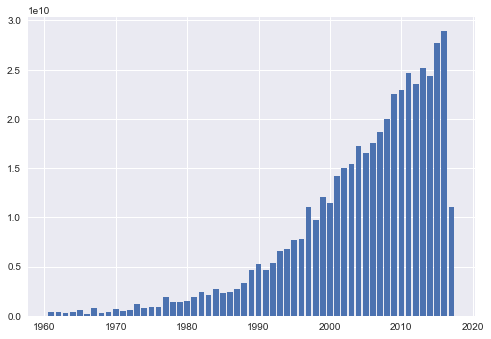

In [16]:
#Generos indexados ===== budget e revenue > 0
df_soma_ano_action = df_action.groupby(pd.Index(index_year_action)).sum()[['budget','revenue']]
df_soma_ano_comedy = df_comedy.groupby(pd.Index(index_year_comedy)).sum()[['budget','revenue']]
df_soma_ano_drama = df_drama.groupby(pd.Index(index_year_drama)).sum()[['budget','revenue']]
df_soma_ano_thriller = df_thriller.groupby(pd.Index(index_year_thriller)).sum()[['budget','revenue']]

df_soma_ano_total = tfg.groupby(pd.Index(index_year1)).sum()[['budget','revenue']]

#Generos indexados ===== Revenue > 0
df_soma_ano_action_r = df_action_r.groupby(pd.Index(index_year_action_r)).sum()[['budget','revenue']]
df_soma_ano_comedy_r = df_comedy_r.groupby(pd.Index(index_year_comedy_r)).sum()[['budget','revenue']]
df_soma_ano_drama_r = df_drama_r.groupby(pd.Index(index_year_drama_r)).sum()[['budget','revenue']]
df_soma_ano_thriller_r = df_thriller_r.groupby(pd.Index(index_year_thriller_r)).sum()[['budget','revenue']]

df_soma_ano_total_r = tfR.groupby(pd.Index(index_year1_r)).sum()[['budget','revenue']]

#plt.bar(df_soma_ano_total.index,df_soma_ano_total["budget"])
plt.bar(df_soma_ano_total.index,df_soma_ano_total["revenue"])

# Inicio dos plots

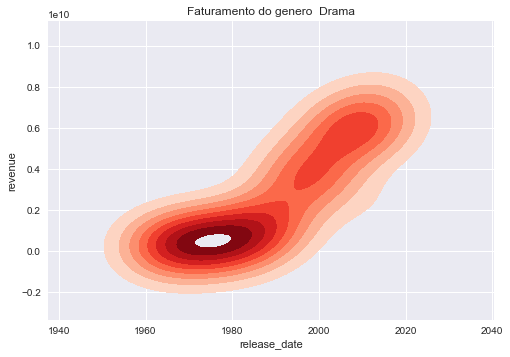

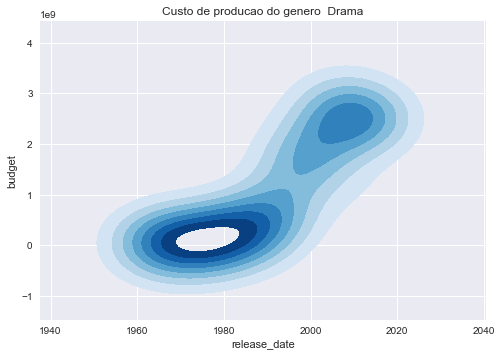

In [17]:
#ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
#...                  cmap="Reds", shade=True, shade_lowest=False)
#ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
#...                  cmap="Blues", shade=True, shade_lowest=False)

sns.kdeplot(df_soma_ano_drama.index,df_soma_ano_drama['revenue'], shade=True,
            cmap="Reds", shade_lowest=False)
plt.title("Faturamento do genero  " + genre_film)
plt.show()

sns.kdeplot(df_soma_ano_drama.index,df_soma_ano_drama['budget'], shade=True,
            cmap="Blues", shade_lowest=False, cbar=True)
plt.title("Custo de producao do genero  " + genre_film)
plt.show()

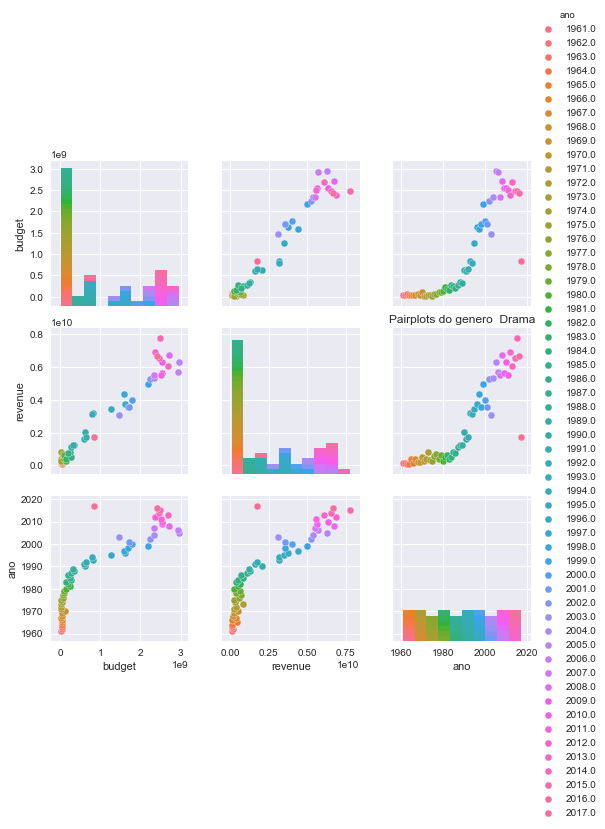

In [18]:
df_soma_ano = df_soma_ano_drama
df_soma_ano['ano'] = df_soma_ano_drama.index

sns.pairplot(df_soma_ano, hue="ano")
plt.title("Pairplots do genero  " + genre_film)

In [19]:
#df_rev_total = df_soma_ano_total[["revenue"]]

df_rev_total = pd.core.frame.DataFrame()
df_rev_total['rev_action'] = df_soma_ano_action_r['revenue']
df_rev_total['rev_comedy'] = df_soma_ano_comedy_r['revenue']
df_rev_total['rev_drama'] = df_soma_ano_drama_r['revenue']
df_rev_total['rev_thriller'] = df_soma_ano_thriller_r['revenue']

df_rev_total = df_rev_total.fillna(0)
df_rev_total['max'] = df_rev_total.max(axis=1)

df_rev_total.head()

,rev_action,rev_comedy,rev_drama,rev_thriller,max
release_date,,,,,
1916.0,8000000,0.0,16394751,0.0,16394751.0
1930.0,12000000,0.0,8000000,0.0,12000000.0
1931.0,2227000,19181.0,14246181,2227000.0,14246181.0
1932.0,600000,0.0,3194025,600000.0,3194025.0
1933.0,10000000,7853000.0,22040000,0.0,22040000.0


In [20]:
#Cria dataframe que diz qual o genero mais popular do ano
#considerando apenas a Bilheteria (revenue>0)

for ano in df_rev_total.index:
    if df_rev_total.loc[ano,"rev_action"]==df_rev_total.loc[ano,"max"]:
        df_rev_total.loc[ano,"gen_ano"]='Action'
    elif df_rev_total.loc[ano,"rev_comedy"]==df_rev_total.loc[ano,"max"]:
        df_rev_total.loc[ano,"gen_ano"]='Comedy'
    elif df_rev_total.loc[ano,"rev_drama"]==df_rev_total.loc[ano,"max"]:
        df_rev_total.loc[ano,"gen_ano"]='Drama'
    elif df_rev_total.loc[ano,"rev_thriller"]==df_rev_total.loc[ano,"max"]:
        df_rev_total.loc[ano,"gen_ano"]='Thriller'

df_rev_total.head()

,rev_action,rev_comedy,rev_drama,rev_thriller,max,gen_ano
release_date,,,,,,
1916.0,8000000,0.0,16394751,0.0,16394751.0,Drama
1930.0,12000000,0.0,8000000,0.0,12000000.0,Action
1931.0,2227000,19181.0,14246181,2227000.0,14246181.0,Drama
1932.0,600000,0.0,3194025,600000.0,3194025.0,Drama
1933.0,10000000,7853000.0,22040000,0.0,22040000.0,Drama


In [40]:
df_rev_gen = df_soma_ano_total_r[["revenue"]]
df_rev_gen['genero'] = df_rev_total['gen_ano']

df_rev_gen['ano']=df_rev_gen.index

df_rev_gen = df_rev_gen[['ano','revenue','genero']]
df_rev_gen.head()


,ano,revenue,genero
release_date,,,
1915.0,1915.0,11137365,NaN
1916.0,1916.0,17784751,Drama
1918.0,1918.0,8000000,NaN
1921.0,1921.0,2500000,NaN
1925.0,1925.0,37249101,NaN


# Bilheteria total - genero mais lucrativo de cada ano

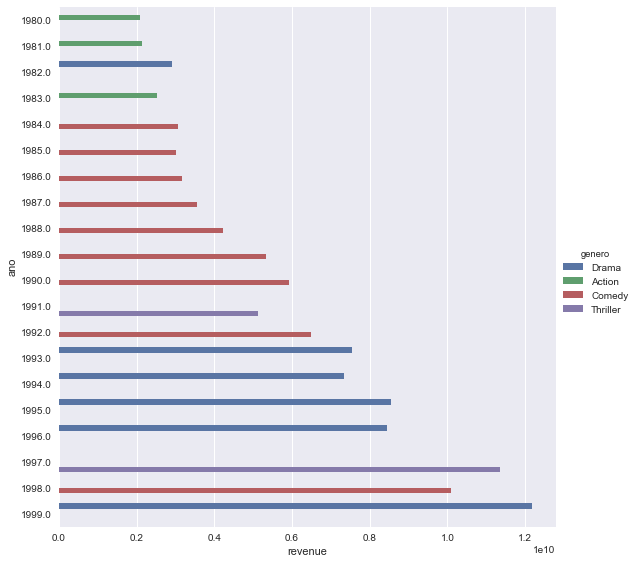

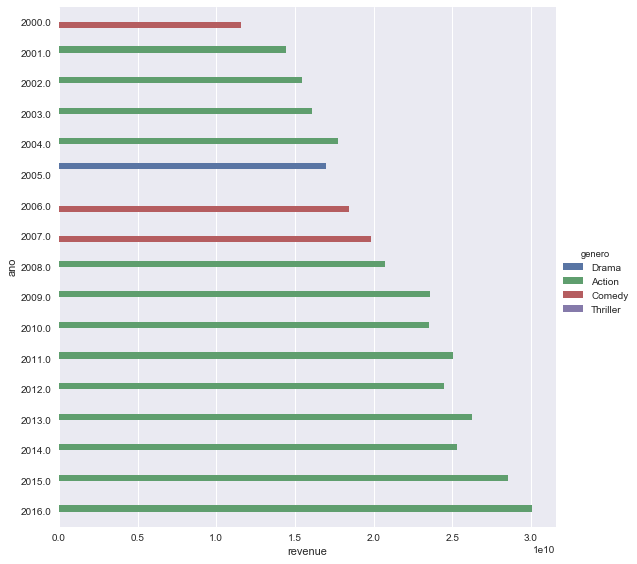

In [33]:
#fig = sns_plot.get_figure()
#fig.savefig("barcores.png")
ho = ['Drama','Action','Comedy','Thriller']

sns_plot = sns.factorplot(x="revenue", y="ano", hue="genero", data=df_rev_gen.loc[1980:1999], kind="bar", orient='h', size=8, aspect=1,hue_order=ho);
#fig = sns_plot.get_figure()
plt.savefig("bilheteria_anual_gen_80-99.png")

sns_plot = sns.factorplot(x="revenue", y="ano", hue="genero", data=df_rev_gen.loc[2000:2016], kind="bar", orient='h', size=8, aspect=1,hue_order=ho);
#fig = sns_plot.get_figure()
plt.savefig("bilheteria_anual_gen_2k-2k16.png")

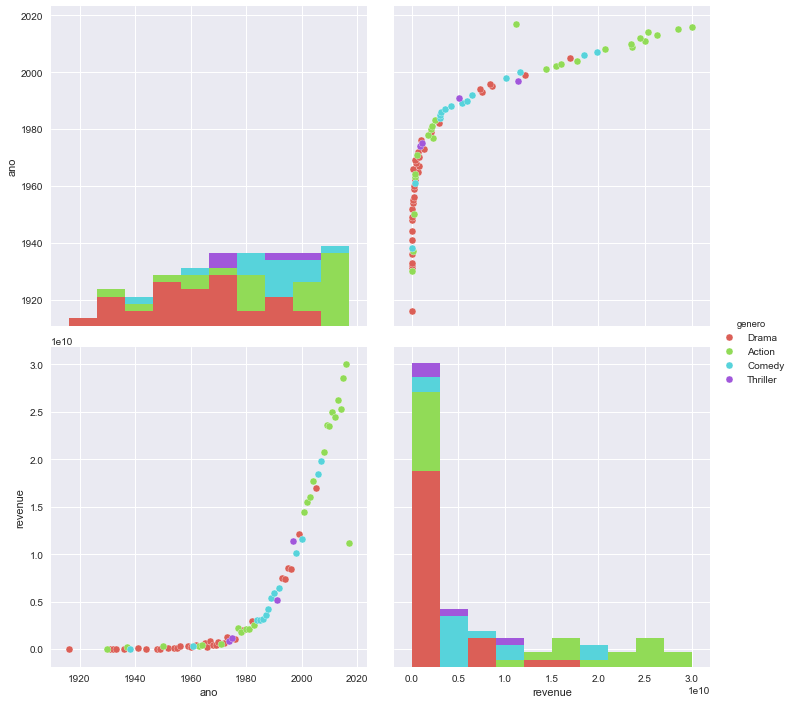

In [53]:
# paletes = hls , husl

sns.pairplot(df_rev_gen, hue="genero", size=5,hue_order=ho, palette='hls')
plt.savefig("bilheteria_alltime.png")
